In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 50.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=646739f2f106540f973973cf89908749cbf7a647908d57a6a11521d05e2219eb
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [4]:
spark = SparkSession.builder.getOrCreate()

In [5]:
df = spark.read.csv('/content/bdiag.csv', inferSchema=True,header=True, sep=',')
df.show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|      id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+--------+---------+-----------+------------+---

In [6]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
#Convertimos las variables categoricas en numeros ficticios
indexer = StringIndexer(inputCol= "diagnosis", outputCol = "diagnostico")
DATOS = indexer.fit(df).transform(df)
#eliminamos la variable original no codificada
DATOS2 = DATOS.drop(*('diagnosis','id'))
DATOS2.show()

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+-----------+
|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|diagnostico|
+-----------+------------+--------------+---------+-----------

In [7]:
DATOS2.printSchema()

root
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radius_worst: double (nullable = true)
 |-- texture_worst: double (nullable = tr

In [8]:
import pandas as pd
pd.DataFrame(DATOS2.take(5), columns=DATOS2.columns).transpose()

,0,1,2,3,4
radius_mean,17.990000,20.570000,19.690000,11.420000,20.290000
texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000
perimeter_mean,122.800000,132.900000,130.000000,77.580000,135.100000
area_mean,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
smoothness_mean,0.118400,0.084740,0.109600,0.142500,0.100300
compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800
concavity_mean,0.300100,0.086900,0.197400,0.241400,0.198000
concave points_mean,0.147100,0.070170,0.127900,0.105200,0.104300
symmetry_mean,0.241900,0.181200,0.206900,0.259700,0.180900
fractal_dimension_mean,0.078710,0.056670,0.059990,0.097440,0.058830


In [9]:
#Observamos cuantos casos tenemos de cada clase
DATOS2.groupBy('diagnostico').count().show()

+-----------+-----+
|diagnostico|count|
+-----------+-----+
|        0.0|  357|
|        1.0|  212|
+-----------+-----+



In [10]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

DATOS2.columns


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'diagnostico']

In [11]:
#estadisticos basicos
numeric_features = [t[0] for t in DATOS2.dtypes if t[1]]
DATOS2.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
radius_mean,569,14.127291739894563,3.5240488262120793,6.981,28.11
texture_mean,569,19.28964850615117,4.301035768166948,9.71,39.28
perimeter_mean,569,91.96903339191566,24.2989810387549,43.79,188.5
area_mean,569,654.8891036906857,351.9141291816529,143.5,2501.0
smoothness_mean,569,0.096360281195079,0.014064128137673616,0.05263,0.1634
compactness_mean,569,0.10434098418277686,0.0528127579325122,0.01938,0.3454
concavity_mean,569,0.08879931581722322,0.07971980870789354,0.0,0.4268
concave points_mean,569,0.048919145869947236,0.03880284485915361,0.0,0.2012
symmetry_mean,569,0.181161862917399,0.027414281336035712,0.106,0.304


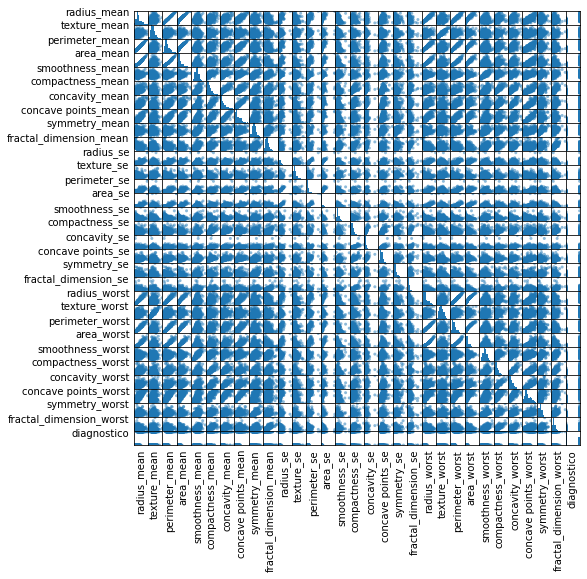

In [ ]:
from pandas.plotting import scatter_matrix
numeric_data = DATOS2.select(numeric_features).toPandas()

axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));

n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [12]:
var_independientes = VectorAssembler(inputCols=['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst'],
 outputCol='features')
var_independientes

VectorAssembler_40e763842a16

In [13]:
output = var_independientes.transform(DATOS2)
output.show()

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+-----------+--------------------+
|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|diagnostico|            features|
+-----------+-------

In [14]:
output.select("features","diagnostico").show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------+
|features                                                                                                                                                                                                                 |diagnostico|
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------+
|[17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]      |1.0        |
|[20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667

In [15]:
datos_regresion = output.select("features","diagnostico")
train,test = datos_regresion.randomSplit([0.7,0.3])

In [16]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'diagnostico', maxIter=10)
lrModel = lr.fit(train)

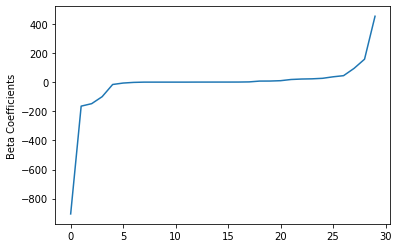

In [17]:
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


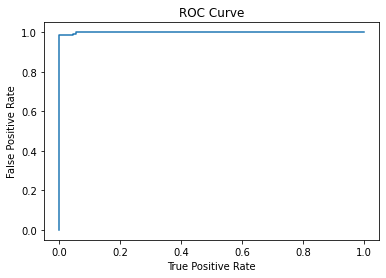

Training set areaUnderROC: 0.9993063984740767


In [18]:
trainingSummary = lrModel.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


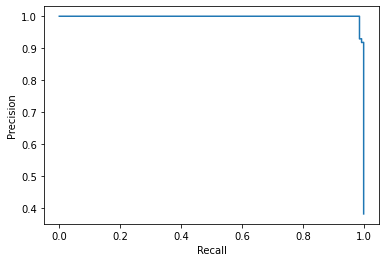

In [19]:
#Precision and recall.

pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [20]:
#predicciones con test


predictions = lrModel.transform(test)
predictions.select('diagnostico','features','rawPrediction','probability','prediction').show(10)

+-----------+--------------------+--------------------+--------------------+----------+
|diagnostico|            features|       rawPrediction|         probability|prediction|
+-----------+--------------------+--------------------+--------------------+----------+
|        0.0|[8.219,20.7,53.27...|[20.1582599913349...|[0.99999999824054...|       0.0|
|        0.0|[8.597,18.6,54.09...|[29.7630558089667...|[0.99999999999988...|       0.0|
|        0.0|[8.598,20.98,54.6...|[21.5999437223246...|[0.99999999958383...|       0.0|
|        0.0|[8.671,14.45,54.4...|[30.4027551805315...|[0.99999999999993...|       0.0|
|        0.0|[8.888,14.64,58.7...|[45.7335300375479...|           [1.0,0.0]|       0.0|
|        0.0|[8.95,15.76,58.74...|[30.3815887228952...|[0.99999999999993...|       0.0|
|        0.0|[9.042,18.9,60.07...|[18.6362965842528...|[0.99999999193955...|       0.0|
|        0.0|[9.268,12.87,61.4...|[22.4029815910149...|[0.99999999981357...|       0.0|
|        0.0|[9.295,13.9,59.96..

In [37]:
#####################################33

from pyspark.ml.classification import LogisticRegression
log_reg = LogisticRegression(featuresCol='features',labelCol='diagnostico')

In [38]:
train, test = datos_regresion.randomSplit([0.7,.3])

In [39]:
fit_model = log_reg.fit(train)
results = fit_model.transform(test)

In [40]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='diagnostico')
results.select('diagnostico','prediction')
AUC = my_eval.evaluate(results)
print("AUC score is : ",AUC)

log_reg

AUC score is :  0.9650075414781298


In [ ]:
log_reg 